# Avances - Eyder Uriel Kinil Cervera

Análisis EDA (Exploratory data analisys)

Análisis Exploratorio de Datos (EDA), es el proceso empleado para analizar y explorar los datos. Una herramienta poderosa del EDA es la visualización, dado que se puede dar indicios de patrones en los datos. Con el EDA se pueden lograr los siguientes objetivos:

1.- Determinar si existen problemas con el dataset.

2.- Determinar si la pregunta que se plantea se puede resolver con el dataset utilizado.

3.- Desarrollar un esquema de respuestas a las preguntas.


# 1.- Formulate your questión

Si se caracterizan los perfiles de carga eléctrica mediante técnicas de agrupamiento es posible agilizar la toma de decisiones en la optimización de la demanda eléctrica para la reducción del costo de las tarifas eléctricas en un % significativo de ahorro.

# 2.- Read your data
Dada una base de datos con perfiles de carga electrica, determine:

- Cantidad de perfiles y frecuencia de monitoreo.
- Medidas de tendencia central y dispersión.
- Muestre los grupos mediante algún método de ML (clustering).

In [93]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Seleccionamos la ubicación de nuestra parte mediante current work direction
os.getcwd()

'c:\\Users\\heyde\\OneDrive - Universidad de Guadalajara\\CUCEA\\Avances de tesis\\Scripts'

In [94]:
#Importamos datos del csv
BD_Electrical_Profiles = pd.read_csv('summer.csv')
#Visualizamos las primeras líneas del dataframe
BD_Electrical_Profiles.head()

,Profile Type and Weather Zone,ERC_TRADE_DATE,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
0,BUSHILF_COAST,21/06/1997,31.10,31.03,30.96,30.89,30.81,30.74,30.68,30.62,...,32.02,31.80,31.54,31.31,31.10,30.90,30.72,30.53,30.34,30.14
1,BUSHILF_COAST,22/06/1997,31.18,31.01,30.84,30.67,30.48,30.32,30.20,30.11,...,32.48,32.30,32.05,31.85,31.66,31.48,31.31,31.13,30.95,30.78
2,BUSHILF_COAST,23/06/1997,30.25,30.16,30.08,29.99,29.90,29.82,29.75,29.70,...,33.94,33.73,33.45,33.21,32.97,32.73,32.48,32.24,32.00,31.76
3,BUSHILF_COAST,24/06/1997,31.09,30.95,30.81,30.66,30.51,30.37,30.25,30.13,...,34.09,33.87,33.56,33.30,33.04,32.77,32.50,32.23,31.96,31.69
4,BUSHILF_COAST,25/06/1997,30.77,30.64,30.52,30.39,30.26,30.14,30.03,29.94,...,33.30,33.07,32.77,32.51,32.24,31.96,31.66,31.37,31.09,30.80


# 3.- Check the packaging

In [95]:
#Visualizamos el tamaño del dataframe
BD_Electrical_Profiles.shape

(5888, 98)

In [96]:
BD_Electrical_Profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5888 entries, 0 to 5887
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Profile Type and Weather Zone  5888 non-null   object 
 1   ERC_TRADE_DATE                 5888 non-null   object 
 2   INT001                         5888 non-null   float64
 3   INT002                         5888 non-null   float64
 4   INT003                         5888 non-null   float64
 5   INT004                         5888 non-null   float64
 6   INT005                         5888 non-null   float64
 7   INT006                         5888 non-null   float64
 8   INT007                         5888 non-null   float64
 9   INT008                         5888 non-null   float64
 10  INT009                         5888 non-null   float64
 11  INT010                         5888 non-null   float64
 12  INT011                         5888 non-null   f

# 4.- Look at the top and the bottom of your data

In [97]:
BD_Electrical_Profiles.head(5)

,Profile Type and Weather Zone,ERC_TRADE_DATE,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
0,BUSHILF_COAST,21/06/1997,31.10,31.03,30.96,30.89,30.81,30.74,30.68,30.62,...,32.02,31.80,31.54,31.31,31.10,30.90,30.72,30.53,30.34,30.14
1,BUSHILF_COAST,22/06/1997,31.18,31.01,30.84,30.67,30.48,30.32,30.20,30.11,...,32.48,32.30,32.05,31.85,31.66,31.48,31.31,31.13,30.95,30.78
2,BUSHILF_COAST,23/06/1997,30.25,30.16,30.08,29.99,29.90,29.82,29.75,29.70,...,33.94,33.73,33.45,33.21,32.97,32.73,32.48,32.24,32.00,31.76
3,BUSHILF_COAST,24/06/1997,31.09,30.95,30.81,30.66,30.51,30.37,30.25,30.13,...,34.09,33.87,33.56,33.30,33.04,32.77,32.50,32.23,31.96,31.69
4,BUSHILF_COAST,25/06/1997,30.77,30.64,30.52,30.39,30.26,30.14,30.03,29.94,...,33.30,33.07,32.77,32.51,32.24,31.96,31.66,31.37,31.09,30.80


In [98]:
BD_Electrical_Profiles.tail(5)

,Profile Type and Weather Zone,ERC_TRADE_DATE,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
5883,RESLOWR_WEST,16/09/1997,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.40,...,0.75,0.73,0.70,0.68,0.65,0.63,0.59,0.56,0.54,0.51
5884,RESLOWR_WEST,17/09/1997,0.49,0.48,0.47,0.46,0.45,0.44,0.43,0.42,...,0.79,0.77,0.74,0.72,0.69,0.67,0.63,0.60,0.58,0.55
5885,RESLOWR_WEST,18/09/1997,0.52,0.50,0.49,0.48,0.47,0.46,0.45,0.44,...,0.73,0.71,0.69,0.67,0.64,0.61,0.58,0.55,0.52,0.50
5886,RESLOWR_WEST,19/09/1997,0.51,0.49,0.48,0.47,0.46,0.45,0.44,0.43,...,0.68,0.66,0.64,0.62,0.60,0.58,0.55,0.53,0.51,0.49
5887,RESLOWR_WEST,20/09/1997,0.46,0.45,0.44,0.43,0.42,0.40,0.39,0.39,...,0.59,0.57,0.56,0.54,0.52,0.50,0.48,0.46,0.44,0.41


# 5.- Check your n's


De los perfiles de carga eléctrica importados podemos observar que se tienen 5,888 perfiles, de los cuales cada uno tiene la etiqueta de la fecha de la toma de las lecturas y se tienen 96 lecturas por cada día de regsitros. Es decir, se tiene una frecuencia de monitoreo de cada 15 minutos.

In [99]:
#Verificamos la cantidad de clientes
BD_Electrical_Profiles.groupby('Profile Type and Weather Zone').count()

,ERC_TRADE_DATE,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,INT009,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
Profile Type and Weather Zone,,,,,,,,,,,,,,,,,,,,,
BUSHILF_COAST,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
BUSHILF_EAST,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
BUSHILF_FWEST,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
BUSHILF_NCENT,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
BUSHILF_NORTH,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESLOWR_NCENT,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
RESLOWR_NORTH,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
RESLOWR_SCENT,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92


# 6.- Validate with at least one external data source

Podemos observar del dataframe que se tienen 64 distintos tipos de perfiles, en donde cada uno tiene 92 series de tiempo con registros cada 15 minutos. Los 5,888 = 64*92 renglones.

In [100]:
#Extraemos un dataframe solo con los datos de un tipo de cliente
Cliente_1 = BD_Electrical_Profiles.loc[BD_Electrical_Profiles['Profile Type and Weather Zone'] == 'BUSHILF_COAST']
#Visualizamos el dataframe creado a partir del tipo de cliente 1
Cliente_1

,Profile Type and Weather Zone,ERC_TRADE_DATE,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
0,BUSHILF_COAST,21/06/1997,31.10,31.03,30.96,30.89,30.81,30.74,30.68,30.62,...,32.02,31.80,31.54,31.31,31.10,30.90,30.72,30.53,30.34,30.14
1,BUSHILF_COAST,22/06/1997,31.18,31.01,30.84,30.67,30.48,30.32,30.20,30.11,...,32.48,32.30,32.05,31.85,31.66,31.48,31.31,31.13,30.95,30.78
2,BUSHILF_COAST,23/06/1997,30.25,30.16,30.08,29.99,29.90,29.82,29.75,29.70,...,33.94,33.73,33.45,33.21,32.97,32.73,32.48,32.24,32.00,31.76
3,BUSHILF_COAST,24/06/1997,31.09,30.95,30.81,30.66,30.51,30.37,30.25,30.13,...,34.09,33.87,33.56,33.30,33.04,32.77,32.50,32.23,31.96,31.69
4,BUSHILF_COAST,25/06/1997,30.77,30.64,30.52,30.39,30.26,30.14,30.03,29.94,...,33.30,33.07,32.77,32.51,32.24,31.96,31.66,31.37,31.09,30.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,BUSHILF_COAST,16/09/1997,31.13,30.97,30.82,30.67,30.51,30.36,30.21,30.08,...,34.01,33.76,33.45,33.18,32.92,32.66,32.42,32.17,31.91,31.66
88,BUSHILF_COAST,17/09/1997,31.16,31.02,30.88,30.74,30.59,30.45,30.32,30.19,...,34.36,34.10,33.79,33.52,33.26,33.00,32.76,32.51,32.26,32.00
89,BUSHILF_COAST,18/09/1997,30.88,30.76,30.64,30.52,30.40,30.29,30.17,30.07,...,33.57,33.31,33.01,32.73,32.47,32.20,31.94,31.68,31.42,31.16
90,BUSHILF_COAST,19/09/1997,31.20,31.05,30.89,30.73,30.56,30.41,30.27,30.14,...,34.14,33.93,33.68,33.44,33.20,32.95,32.68,32.43,32.17,31.92


# 7.- Make a plot

Procedemos a verificar si los perfiles de carga eléctrica se observan en el mismo rango de consumo para graficar.

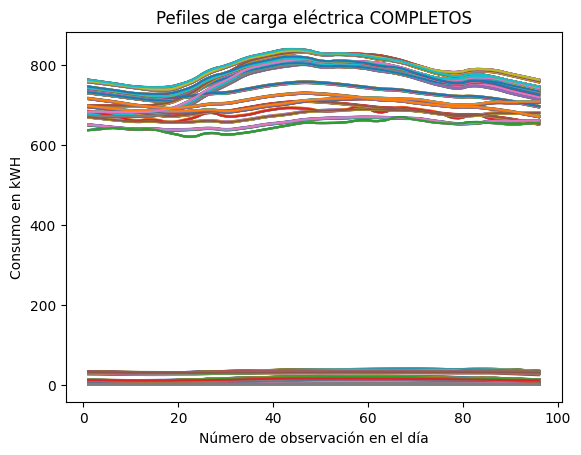

In [101]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(data)
#Creamos el gráfico
plt.title("Pefiles de carga eléctrica COMPLETOS")
for i in range(0,señales):
    plt.plot(x,data_array[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Consumo en kWH')
plt.savefig('BD.png')
plt.show()

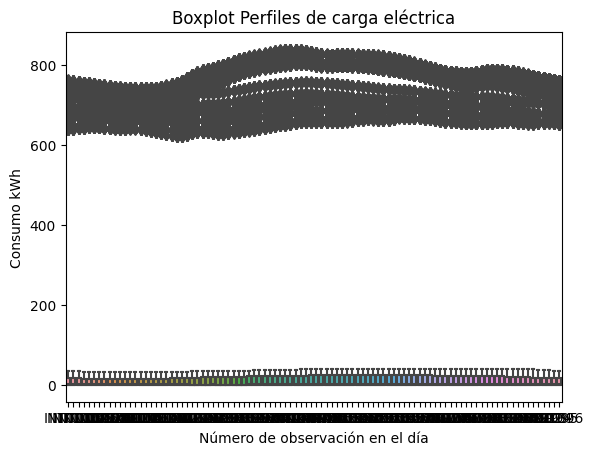

In [102]:
#Graficamos el boxplot para verificar la variación en las muestras
plt.title('Boxplot Perfiles de carga eléctrica')
sns.boxplot(BD_Electrical_Profiles)
plt.xlabel('Número de observación en el día')
plt.ylabel('Consumo kWh')
plt.savefig('Boxplot.png')
plt.show()

# 8.- Try the easy solution

In [103]:
#Extraemos un solo los valores de consumo del cliente 
lecturas_cliente_1 = Cliente_1.drop(['Profile Type and Weather Zone','ERC_TRADE_DATE'],axis=1)
#Convertimos el dataframe a un array 
lecturas_1 = lecturas_cliente_1.to_numpy()
#Visualizamos los datos de consumo del cliente
lecturas_cliente_1

,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,INT009,INT010,...,INT087,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096
0,31.10,31.03,30.96,30.89,30.81,30.74,30.68,30.62,30.58,30.52,...,32.02,31.80,31.54,31.31,31.10,30.90,30.72,30.53,30.34,30.14
1,31.18,31.01,30.84,30.67,30.48,30.32,30.20,30.11,30.06,29.98,...,32.48,32.30,32.05,31.85,31.66,31.48,31.31,31.13,30.95,30.78
2,30.25,30.16,30.08,29.99,29.90,29.82,29.75,29.70,29.65,29.60,...,33.94,33.73,33.45,33.21,32.97,32.73,32.48,32.24,32.00,31.76
3,31.09,30.95,30.81,30.66,30.51,30.37,30.25,30.13,30.02,29.92,...,34.09,33.87,33.56,33.30,33.04,32.77,32.50,32.23,31.96,31.69
4,30.77,30.64,30.52,30.39,30.26,30.14,30.03,29.94,29.84,29.76,...,33.30,33.07,32.77,32.51,32.24,31.96,31.66,31.37,31.09,30.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,31.13,30.97,30.82,30.67,30.51,30.36,30.21,30.08,29.94,29.81,...,34.01,33.76,33.45,33.18,32.92,32.66,32.42,32.17,31.91,31.66
88,31.16,31.02,30.88,30.74,30.59,30.45,30.32,30.19,30.05,29.93,...,34.36,34.10,33.79,33.52,33.26,33.00,32.76,32.51,32.26,32.00
89,30.88,30.76,30.64,30.52,30.40,30.29,30.17,30.07,29.95,29.85,...,33.57,33.31,33.01,32.73,32.47,32.20,31.94,31.68,31.42,31.16
90,31.20,31.05,30.89,30.73,30.56,30.41,30.27,30.14,30.02,29.90,...,34.14,33.93,33.68,33.44,33.20,32.95,32.68,32.43,32.17,31.92


**Comentarios Eyder Uriel Kinil Cervera**

Para el cálculo de la media de consumo del cliente 1 debemos hacer la consideración de que se requiere tener la media de consumo para cada muestra "hora", a fin de caracterizar el perfil de carga eléctrica a traves del tiempo, manteniendo la dinamica del consumo a traves del paso de las horas. Esta consideración nos dara la media de cada por cada hora asimilando un vector de dator, en caso de no hacer esta consideración la matriz completa se reduciría a un valor escalar sin mantener la variación en el tiempo.

In [104]:
#Ejemplo de calculo de la media sin mantener la variación en el tiempo
media_escalar = np.mean(lecturas_1)
print(f'La media sin variación en el tiempo (escalar) es de {media_escalar} kWH')

La media sin variación en el tiempo (escalar) es de 32.343358242753624 kWH


In [105]:
#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
media_vectorial = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in lecturas_1]   #Ciclo for para la extracción de los registros de cada hora
    media_vectorial.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro
print(f'La media conservando la variación en el día es {media_vectorial} kWH')

La media conservando la variación en el día es [31.50260869565217, 31.342934782608708, 31.183043478260867, 31.023369565217394, 30.8529347826087, 30.699239130434776, 30.56021739130435, 30.439239130434785, 30.322391304347825, 30.21152173913043, 30.11663043478261, 30.039021739130426, 29.95173913043478, 29.891521739130436, 29.868913043478262, 29.884565217391305, 29.89815217391304, 29.9470652173913, 30.058586956521737, 30.232826086956532, 30.44804347826087, 30.652608695652173, 30.886630434782607, 31.15086956521739, 31.534565217391304, 31.759130434782605, 31.83652173913043, 31.766739130434786, 31.518478260869575, 31.420434782608698, 31.384565217391305, 31.41054347826087, 31.47, 31.53, 31.628913043478256, 31.76826086956521, 31.952608695652174, 32.10108695652175, 32.23717391304347, 32.361847826086944, 32.47869565217392, 32.59760869565218, 32.711304347826086, 32.81956521739129, 32.93739130434783, 33.03554347826088, 33.10956521739131, 33.1604347826087, 33.19717391304348, 33.23380434782609, 33.25

In [106]:
#Ejemplo de cálculo de la mediana manteniendo la variación en el tiempo
mediana_vectorial = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in lecturas_1]   #Ciclo for para la extracción de los registros de cada hora
    mediana_vectorial.append(np.median(columna))    #Cálculo de la mediana para cada hora en los días de registro
print(f'La media conservando la variación en el día es {mediana_vectorial} kWH')

La media conservando la variación en el día es [31.520000000000003, 31.38, 31.22, 31.075, 30.915, 30.75, 30.64, 30.53, 30.42, 30.325, 30.235, 30.16, 30.085, 30.015, 29.99, 30.005000000000003, 30.009999999999998, 30.055, 30.175, 30.355, 30.555, 30.75, 30.950000000000003, 31.2, 31.605, 31.85, 31.95, 31.89, 31.615000000000002, 31.525, 31.525, 31.585, 31.595, 31.615000000000002, 31.705, 31.86, 32.03, 32.175, 32.32, 32.455, 32.585, 32.685, 32.785, 32.91, 33.035, 33.13, 33.19, 33.224999999999994, 33.235, 33.269999999999996, 33.285, 33.29, 33.295, 33.33, 33.37, 33.394999999999996, 33.42, 33.47, 33.495, 33.505, 33.49, 33.495000000000005, 33.510000000000005, 33.525000000000006, 33.555, 33.57, 33.56, 33.545, 33.53, 33.53, 33.51, 33.46, 33.4, 33.370000000000005, 33.34, 33.375, 33.385000000000005, 33.385000000000005, 33.525, 33.715, 34.11, 34.33, 34.445, 34.435, 34.33, 34.260000000000005, 34.115, 33.905, 33.58, 33.31, 33.095, 32.885, 32.66, 32.42, 32.215, 31.979999999999997] kWH


In [107]:
#Ejemplo de cálculo de la varianza manteniendo la variación en el tiempo
var_vectorial = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in lecturas_1]   #Ciclo for para la extracción de los registros de cada hora
    var_vectorial.append(np.var(columna))    #Cálculo de la varianza para cada hora en los días de registro
print(f'La media conservando la variación en el día es {var_vectorial} kWH')

La media conservando la variación en el día es [0.4322758034026468, 0.4126859522684309, 0.39506465028355425, 0.38096581994328893, 0.37060986531190915, 0.36184833412098294, 0.357215170132325, 0.3530200732514178, 0.348357325141777, 0.34604333648393193, 0.3448071242911154, 0.34356099952741026, 0.3450013232514177, 0.34427159735349716, 0.3431770793950851, 0.34020524574669175, 0.3350128898865787, 0.33815334357277904, 0.3489012641776937, 0.37226157844990554, 0.4284396502835537, 0.46951710775047256, 0.4965810373345933, 0.5119622873345938, 0.5232030718336486, 0.5573666351606804, 0.5974183364839322, 0.6407024102079398, 0.6924781190926271, 0.7384802457466914, 0.7697422022684314, 0.7893160089792058, 0.8131456521739137, 0.8398195652173909, 0.8585183837429109, 0.8615317580340269, 0.853595368620038, 0.8568249054820413, 0.8540137523629489, 0.8513172377126655, 0.8419961247637057, 0.8383855860113417, 0.8384309073724008, 0.839930245746692, 0.8451671077504723, 0.8466812263705106, 0.8451672022684313, 0.840

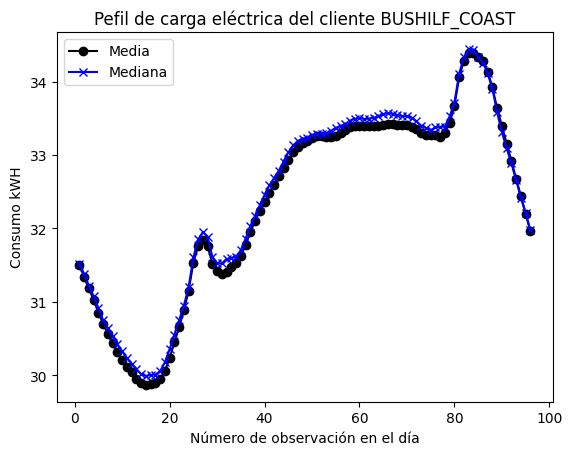

In [108]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(lecturas_cliente_1)
#Creamos el gráfico
plt.title("Pefil de carga eléctrica del cliente BUSHILF_COAST")
plt.plot(x,media_vectorial,'-o',color='black',label='Media')
plt.plot(x,mediana_vectorial,'-x',color='blue',label='Mediana')
plt.xlabel("Número de observación en el día")
plt.ylabel('Consumo kWH')
plt.legend(loc = "upper left")
plt.savefig('Media.png')
plt.show()


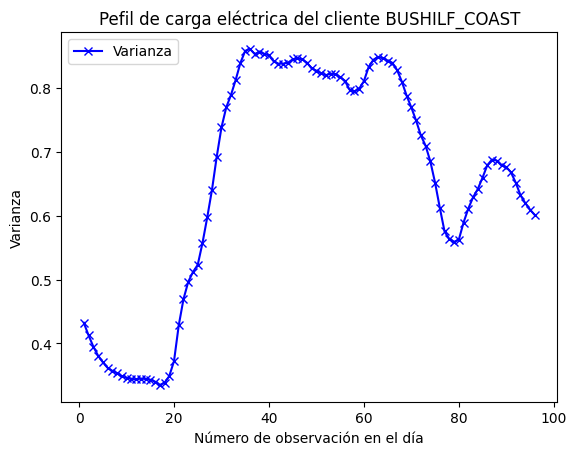

In [109]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(lecturas_cliente_1)
#Creamos el gráfico
plt.title("Pefil de carga eléctrica del cliente BUSHILF_COAST")
plt.plot(x,var_vectorial,'-x',color='blue',label='Varianza')
plt.xlabel("Número de observación en el día")
plt.ylabel('Varianza')
plt.legend(loc = "upper left")
plt.savefig('Varianza.png')
plt.show()

**Comentarios Eyder Uriel Kinil Cervera**

En el gráfico anterior se aprecia que la media sigue la misma dinámica que la mediana en las lecturas tomadas para el cliente BUSHILF_COAST.

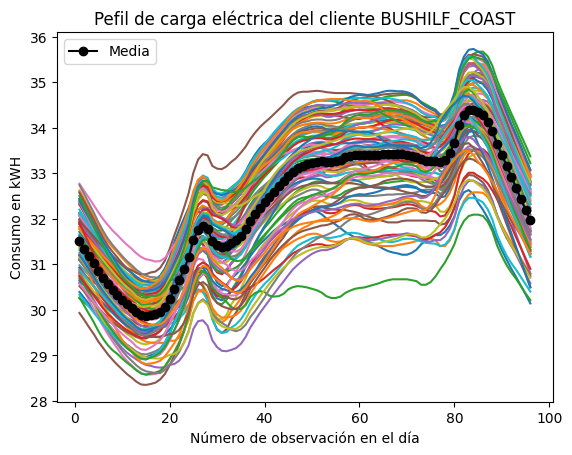

In [110]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(lecturas_cliente_1)
#Creamos el gráfico
plt.title("Pefil de carga eléctrica del cliente BUSHILF_COAST")
for i in range(0,señales):
    plt.plot(x,lecturas_1[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Consumo en kWH')
plt.plot(x,media_vectorial,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Perfil_bus.png')
plt.show()

**Comentarios Eyder Uriel Kinil Cervera**

En el gráfico anterior se aprecian los registros de consumo de cada día del cliente BUSHILF_COAST en las distintas líneas de colores, también se muestra el consumo promedio a través del tiempo en la línea de color negro. Este consumo promedio caracteriza al cliente, se puede inferir dado que el eje x representa las muestras cada 15 minutos que el consumo en las primeras 25 muestras se tiene una tendencia a la baja lo que se puede interpretar como consumo mínimo de las 0:00 horas a la 06:30 horas, a partir del regristro 26 se empieza a tener un consumo a la alza hasta llegar al registro 85 que corresponde aproximadamente a las 21:45 horas y empieza a descender para reiniciar el ciclo. Este comportamiento denota mayor actividad en el día y en la noche un periodo de disminución.

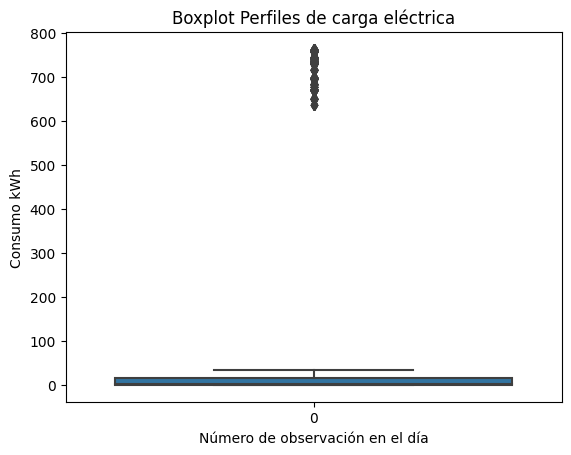

In [111]:
#Graficamos el boxplot para verificar la variación en las muestras
plt.title('Boxplot Perfiles de carga eléctrica')
sns.boxplot(BD_Electrical_Profiles['INT001'])
plt.xlabel('Número de observación en el día')
plt.ylabel('Consumo kWh')
plt.savefig('Boxplot2.png')
plt.show()


Se aprecia en el grafico de boxplot que la mediana se encuentra en el rango de 0 a 100 kWH, por lo que para no perder información procederemos con la normalización de los datos.

**Normalización Z**

$X_z = \frac{X_i -\mu_i}{\sigma_i}$

In [112]:
from scipy import stats

zscore_df = stats.zscore(data, axis=1)

zscore_array = zscore_df.to_numpy()

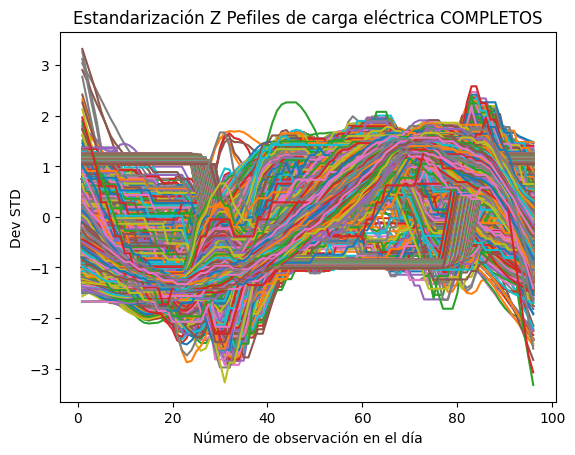

In [113]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(data)
#Creamos el gráfico
plt.title("Estandarización Z Pefiles de carga eléctrica COMPLETOS")
for i in range(0,señales):
    plt.plot(x,zscore_array[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.savefig('Zscore.png')
plt.show()

In [114]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [115]:
model = KMeans(n_clusters=8, max_iter = 100)
model.fit(zscore_df)

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100)

In [116]:
# podemos ver que observaciones pertenecen a cada uno de los clusters

model.labels_

array([4, 4, 4, ..., 1, 1, 1])

In [117]:
# Dataframe para clustering con k medias
df_k = zscore_df.copy()

# Incluimos los modelos generados (hierarchy y kmeans) en el dataset normalizado
df_k['Cluster_Labels'] = model.labels_

df_k

,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,INT009,INT010,...,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096,Cluster_Labels
0,-0.302304,-0.412952,-0.523599,-0.634247,-0.760701,-0.871348,-0.966189,-1.061029,-1.124256,-1.219097,...,0.804169,0.393193,0.029638,-0.302304,-6.184398e-01,-0.902962,-1.203290,-1.503619,-1.819754,4
1,0.207356,0.000127,-0.207102,-0.414331,-0.645940,-0.840979,-0.987258,-1.096968,-1.157917,-1.255437,...,1.572629,1.267881,1.024082,0.792473,5.730541e-01,0.365825,0.146406,-0.073013,-0.280242,4
2,-1.341195,-1.403189,-1.458295,-1.520289,-1.582283,-1.637389,-1.685606,-1.720048,-1.754489,-1.788930,...,1.055908,0.863037,0.697720,0.532403,3.670851e-01,0.194879,0.029562,-0.135755,-0.301073,4
3,-0.829962,-0.930482,-1.031001,-1.138701,-1.246401,-1.346921,-1.433081,-1.519241,-1.598220,-1.670020,...,1.166075,0.943495,0.756816,0.570136,3.762762e-01,0.182417,-0.011443,-0.205303,-0.399162,4
4,-0.918408,-1.018739,-1.111351,-1.211682,-1.312012,-1.404625,-1.489520,-1.558979,-1.636156,-1.697898,...,0.856667,0.625135,0.424475,0.216096,-2.741884e-15,-0.231532,-0.455345,-0.671442,-0.895255,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883,-0.438989,-0.496482,-0.553976,-0.611470,-0.668964,-0.726457,-0.783951,-0.841445,-0.898939,-0.956432,...,1.055849,0.883367,0.768380,0.595899,4.809112e-01,0.250936,0.078455,-0.036532,-0.209014,1
5884,-0.491870,-0.545712,-0.599554,-0.653396,-0.707238,-0.761080,-0.814922,-0.868764,-0.868764,-0.922606,...,1.015708,0.854182,0.746498,0.584972,4.772874e-01,0.261919,0.100393,-0.007291,-0.168817,1
5885,-0.268228,-0.397951,-0.462812,-0.527673,-0.592534,-0.657395,-0.722257,-0.787118,-0.787118,-0.851979,...,0.964135,0.834412,0.704690,0.510106,3.155228e-01,0.120939,-0.073644,-0.268228,-0.397951,1
5886,-0.169432,-0.314015,-0.386306,-0.458597,-0.530888,-0.603179,-0.675470,-0.747762,-0.820053,-0.892344,...,0.914935,0.770353,0.625770,0.481188,3.366056e-01,0.119732,-0.024850,-0.169432,-0.314015,1


In [118]:
#Seleccionando un estado del dataframe
Cluster_1 = df_k.loc[df_k['Cluster_Labels'] == 0]
Cluster_1

,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,INT009,INT010,...,INT088,INT089,INT090,INT091,INT092,INT093,INT094,INT095,INT096,Cluster_Labels
231,1.771733,1.657530,1.543327,1.448158,1.314921,1.219752,1.143616,1.105549,1.105549,1.067481,...,-1.311749,-1.483053,-1.597256,-1.711459,-1.825662,-1.939865,-2.054068,-2.168271,-2.263440,0
236,-0.675172,-0.651827,-0.640155,-0.616810,-0.593466,-0.570121,-0.570121,-0.581793,-0.605138,-0.616810,...,-1.538925,-1.667321,-1.784044,-1.900768,-2.005819,-2.099197,-2.204248,-2.309300,-2.414351,0
242,-0.332321,-0.350666,-0.369012,-0.387357,-0.405703,-0.424048,-0.460739,-0.515776,-0.607503,-0.662539,...,-1.506431,-1.671541,-1.799959,-1.891687,-1.946723,-1.983414,-2.038450,-2.093487,-2.148523,0
243,-0.168698,-0.217235,-0.249592,-0.298129,-0.330486,-0.379023,-0.443738,-0.508454,-0.621706,-0.686421,...,-1.236501,-1.414469,-1.576257,-1.721866,-1.851297,-1.964549,-2.093980,-2.223410,-2.336662,0
247,3.038242,2.851003,2.687169,2.499930,2.312692,2.125453,1.938214,1.774380,1.587141,1.423307,...,-1.034202,-1.174631,-1.291655,-1.385274,-1.478894,-1.549108,-1.619323,-1.712942,-1.783157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.749384,0.642172,0.534289,0.426407,0.323885,0.213992,0.094718,-0.031926,-0.174653,-0.300628,...,-1.276931,-1.398215,-1.523520,-1.660216,-1.808973,-1.969122,-2.121899,-2.274677,-2.427455,0
1457,0.749387,0.641887,0.534387,0.426887,0.324274,0.213982,0.094615,-0.032430,-0.174833,-0.300482,...,-1.277056,-1.398517,-1.523468,-1.660286,-1.808971,-1.969523,-2.122396,-2.274571,-2.427444,0
1464,0.749848,0.641799,0.534448,0.426399,0.323928,0.213788,0.095283,-0.032284,-0.174490,-0.300662,...,-1.277281,-1.398574,-1.523352,-1.659981,-1.809158,-1.969488,-2.122150,-2.274812,-2.427474,0
1471,0.749265,0.642060,0.534160,0.426259,0.323927,0.213938,0.094899,-0.031797,-0.174505,-0.300505,...,-1.277181,-1.398308,-1.523613,-1.660055,-1.809028,-1.969138,-2.122288,-2.274741,-2.427195,0


In [119]:
#Extraemos un solo los valores de consumo del cliente 
Grupo_1 = Cluster_1.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G1 = Grupo_1.to_numpy()

In [120]:
#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_1 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G1]   #Ciclo for para la extracción de los registros de cada hora
    centroide_1.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

In [121]:
#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
c_1 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G1]   #Ciclo for para la extracción de los registros de cada hora
    c_1.append(np.var(columna))    #Cálculo de la media para cada hora en los días de registro

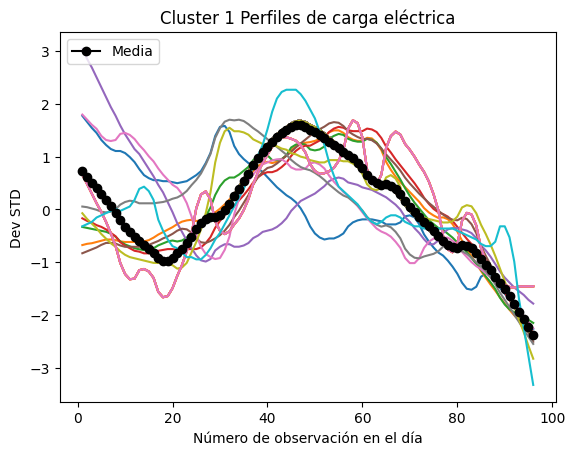

In [122]:
#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_1)
#Creamos el gráfico
plt.title("Cluster 1 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G1[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_1,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_1.png')
plt.show()

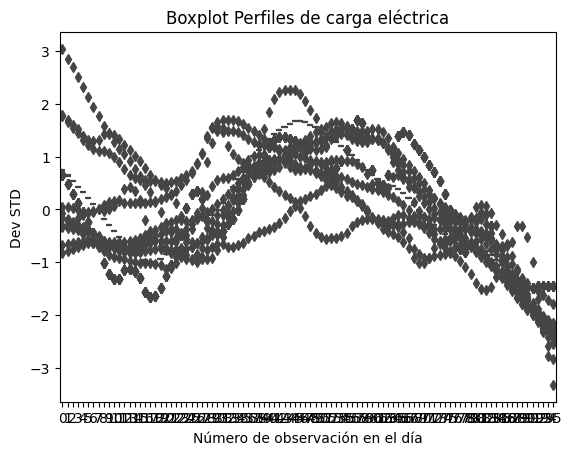

In [123]:
#Graficamos el boxplot para verificar la variación en las muestras
plt.title('Boxplot Perfiles de carga eléctrica')
sns.boxplot(G1)
plt.xlabel('Número de observación en el día')
plt.ylabel('Dev STD')
plt.savefig('BoxplotG1.png')
plt.show()

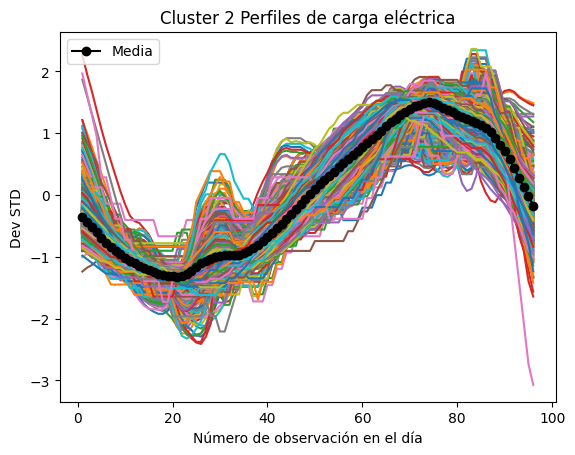

In [124]:
#Seleccionando un estado del dataframe
Cluster_2 = df_k.loc[df_k['Cluster_Labels'] == 1]
Cluster_2

#Extraemos un solo los valores de consumo del cliente 
Grupo_2 = Cluster_2.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G2 = Grupo_2.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_2 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G2]   #Ciclo for para la extracción de los registros de cada hora
    centroide_2.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_2)
#Creamos el gráfico
plt.title("Cluster 2 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G2[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_2,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_2.png')
plt.show()

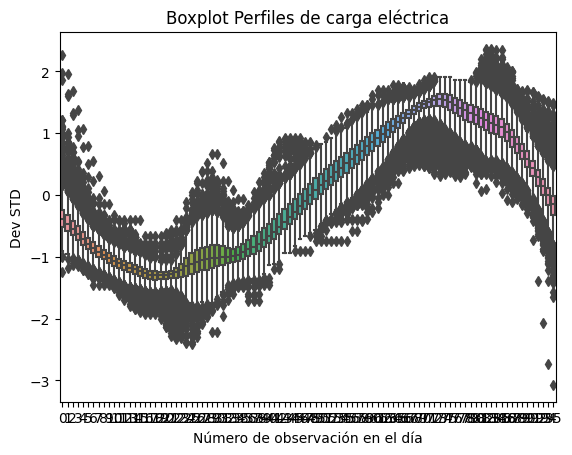

In [125]:
#Graficamos el boxplot para verificar la variación en las muestras
plt.title('Boxplot Perfiles de carga eléctrica')
sns.boxplot(G2)
plt.xlabel('Número de observación en el día')
plt.ylabel('Dev STD')
plt.savefig('BoxplotG2.png')
plt.show()

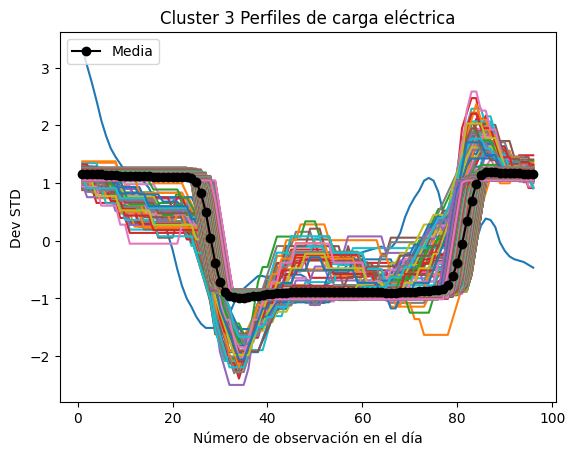

In [126]:
#Seleccionando un estado del dataframe
Cluster_3 = df_k.loc[df_k['Cluster_Labels'] == 2]
Cluster_3

#Extraemos un solo los valores de consumo del cliente 
Grupo_3 = Cluster_3.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G3 = Grupo_3.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_3 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G3]   #Ciclo for para la extracción de los registros de cada hora
    centroide_3.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_3)
#Creamos el gráfico
plt.title("Cluster 3 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G3[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_3,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_3.png')
plt.show()

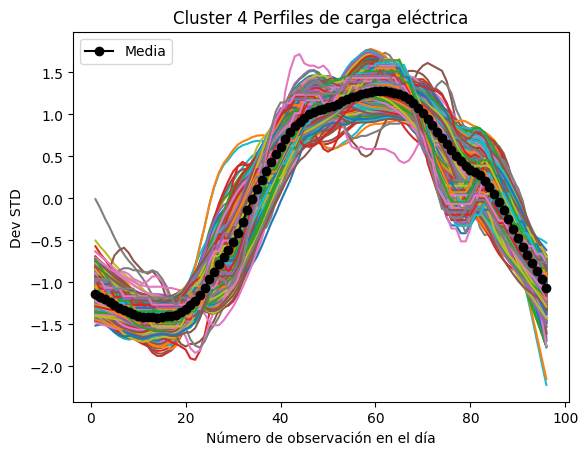

In [127]:
#Seleccionando un estado del dataframe
Cluster_4 = df_k.loc[df_k['Cluster_Labels'] == 3]
Cluster_4

#Extraemos un solo los valores de consumo del cliente 
Grupo_4 = Cluster_4.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G4 = Grupo_4.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_4 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G4]   #Ciclo for para la extracción de los registros de cada hora
    centroide_4.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_4)
#Creamos el gráfico
plt.title("Cluster 4 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G4[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_4,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_4.png')
plt.show()

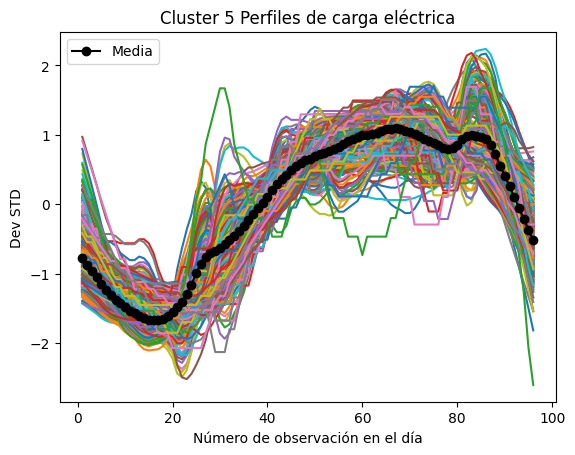

In [128]:
#Seleccionando un estado del dataframe
Cluster_5 = df_k.loc[df_k['Cluster_Labels'] == 4]
Cluster_5

#Extraemos un solo los valores de consumo del cliente 
Grupo_5 = Cluster_5.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G5 = Grupo_5.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_5 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G5]   #Ciclo for para la extracción de los registros de cada hora
    centroide_5.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_5)
#Creamos el gráfico
plt.title("Cluster 5 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G5[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')

plt.plot(x,centroide_5,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_5.png')
plt.show()

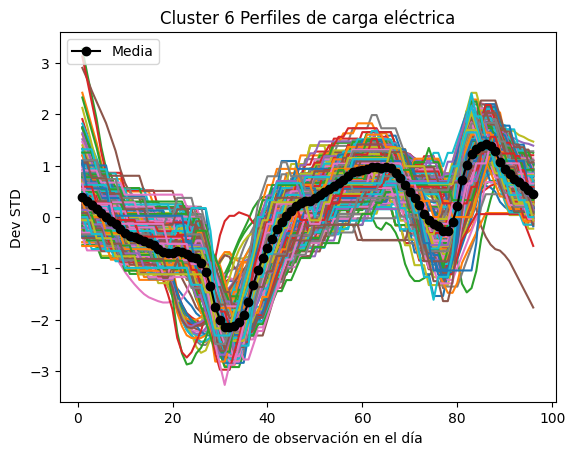

In [129]:
#Seleccionando un estado del dataframe
Cluster_6 = df_k.loc[df_k['Cluster_Labels'] == 5]
Cluster_6

#Extraemos un solo los valores de consumo del cliente 
Grupo_6 = Cluster_6.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G6 = Grupo_6.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_6 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G6]   #Ciclo for para la extracción de los registros de cada hora
    centroide_6.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_6)
#Creamos el gráfico
plt.title("Cluster 6 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G6[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_6,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_6.png')
plt.show()

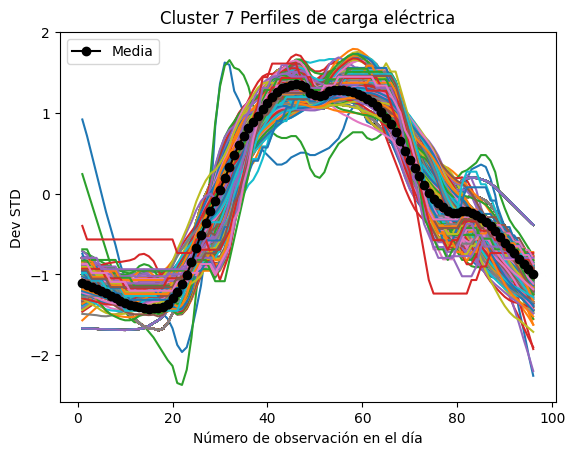

In [130]:
#Seleccionando un estado del dataframe
Cluster_7 = df_k.loc[df_k['Cluster_Labels'] == 6]
Cluster_7

#Extraemos un solo los valores de consumo del cliente 
Grupo_7 = Cluster_7.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G7 = Grupo_7.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_7 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G7]   #Ciclo for para la extracción de los registros de cada hora
    centroide_7.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_7)
#Creamos el gráfico
plt.title("Cluster 7 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G7[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')
plt.plot(x,centroide_7,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_7.png')
plt.show()

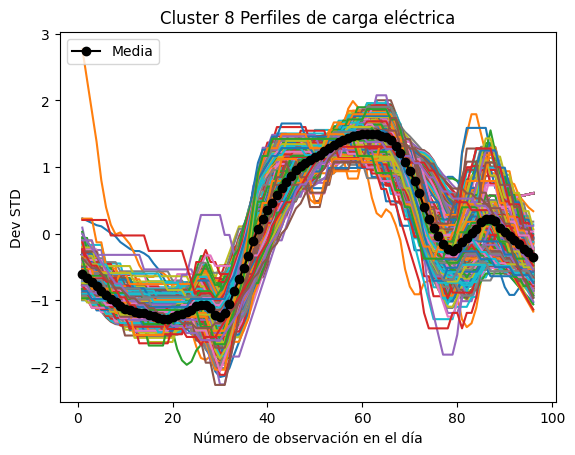

In [131]:
#Seleccionando un estado del dataframe
Cluster_8 = df_k.loc[df_k['Cluster_Labels'] == 7]
Cluster_8

#Extraemos un solo los valores de consumo del cliente 
Grupo_8 = Cluster_8.drop(['Cluster_Labels'],axis=1)
#Convertimos el dataframe a un array 
G8 = Grupo_8.to_numpy()

#Ejemplo de cálculo de la media manteniendo la variación en el tiempo
centroide_8 = []    #Vector donde se guardaran los datos 
for i in range(0,96):   #Ciclo for para el cálculo de la media de cada hora
    columna = [fila[i]for fila in G8]   #Ciclo for para la extracción de los registros de cada hora
    centroide_8.append(np.mean(columna))    #Cálculo de la media para cada hora en los días de registro

#Creamos el vector de número de lecturas por día
x = np.linspace(1,96,96)
#Definimos la cantidad de señales (días)
señales = len(Grupo_8)
#Creamos el gráfico
plt.title("Cluster 8 Perfiles de carga eléctrica")
for i in range(0,señales):
    plt.plot(x,G8[i])
    plt.xlabel('Número de observación en el día')
    plt.ylabel('Dev STD')

plt.plot(x,centroide_8,'-o',color='black',label='Media')
plt.legend(loc = "upper left")
plt.savefig('Cluster_8.png')
plt.show()

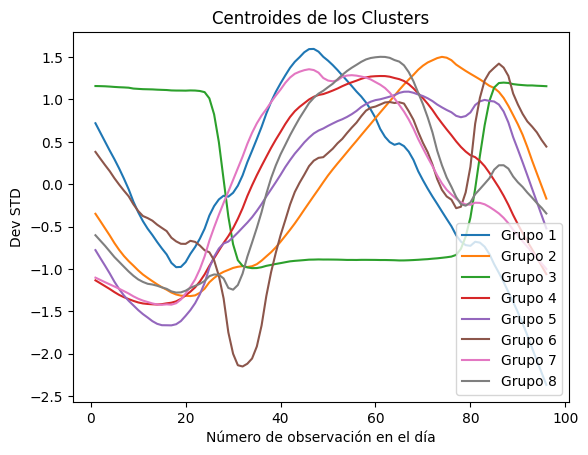

In [132]:
x = np.linspace(1,96,96)
plt.title('Centroides de los Clusters')
plt.plot(x,centroide_1,label='Grupo 1')
plt.plot(x,centroide_2,label='Grupo 2')
plt.plot(x,centroide_3,label='Grupo 3')
plt.plot(x,centroide_4,label='Grupo 4')
plt.plot(x,centroide_5,label='Grupo 5')
plt.plot(x,centroide_6,label='Grupo 6')
plt.plot(x,centroide_7,label='Grupo 7')
plt.plot(x,centroide_8,label='Grupo 8')
plt.legend(loc = "lower right")
plt.xlabel('Número de observación en el día')
plt.ylabel('Dev STD')
plt.savefig('Centroides.png')
plt.show()